In [1]:
# Chapter 3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [2]:
# Read height - weight dataset
dataset = np.loadtxt('book_code/Section 2/height-weight.csv', delimiter=',')

In [3]:
#dataset.head()

In [4]:
dataset.shape

(5000, 2)

In [5]:
dataset[:10]

array([[ 73.84701702, 241.8935632 ],
       [ 68.78190405, 162.3104725 ],
       [ 74.11010539, 212.7408556 ],
       [ 71.7309784 , 220.0424703 ],
       [ 69.88179586, 206.3498006 ],
       [ 67.25301569, 152.2121558 ],
       [ 68.78508125, 183.9278886 ],
       [ 68.34851551, 167.9711105 ],
       [ 67.01894966, 175.9294404 ],
       [ 63.45649398, 156.3996764 ]])

In [6]:
# Separate data
X = dataset[:,0]
Y = dataset[:,1]

In [15]:
X.shape

(5000,)

In [16]:
X[:10]

array([73.84701702, 68.78190405, 74.11010539, 71.7309784 , 69.88179586,
       67.25301569, 68.78508125, 68.34851551, 67.01894966, 63.45649398])

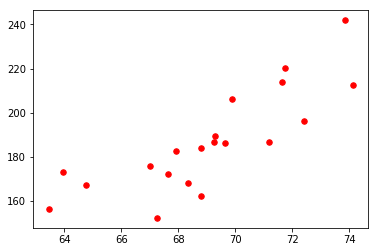

In [17]:
plt.scatter(X[:20], Y[:20], color='red', s=30)

In [18]:
# Split the data into training and test
# Training data
X_train = X[:4500]
y_train = Y[:4500]
# Test dataset
X_test = X[4500:]
y_test = Y[4500:]

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4500,)
(4500,)
(500,)
(500,)


In [20]:
# There is a reshape explained in the video that doesn't work here
X_train = X_train.reshape(-1, 1)
X_train.shape

(4500, 1)

In [21]:
X_train[:,:10]

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [64.45121158],
       [67.38177284],
       [71.36636548]])

In [22]:
y_train = y_train.reshape(-1, 1)
y_train.shape

(4500, 1)

In [23]:
y_train[:,:10]

array([[241.8935632],
       [162.3104725],
       [212.7408556],
       ...,
       [147.0446574],
       [179.319259 ],
       [199.8815852]])

In [24]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [25]:
# Train the model
regr.fit(X_train, y_train)

/Users/mbernal/clasificador/private_data/src/code_repos/machine_learning/ml-playground/python/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
# Reshape test vectors
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

ValueError: Expected 2D array, got 1D array instead:
array=[69.30053044 70.20434795 66.71039099 72.43208104 69.93619073 68.50236782
 63.65150825 72.26118465 65.90450664 74.09119004 69.65651121 71.86159981
 69.01202847 68.56137117 70.23041113 65.79677819 66.29642277 67.79858033
 68.21165696 72.79321973 68.72121802 67.04290303 70.77035713 67.52266055
 72.96222705 66.55398638 64.39582837 69.99746382 69.21763371 71.45373738
 71.93849595 68.99565852 65.03410216 70.03048877 68.30500073 73.11317679
 70.72429207 68.84947966 65.93692307 71.52734143 72.65314462 67.52597275
 70.22164729 73.22307094 69.68445763 69.74491521 69.51146903 69.81272464
 62.53713921 71.57050822 70.4599451  68.18615715 70.15601265 69.67261869
 68.3844491  61.97668615 67.10706563 65.10293487 68.59195403 66.37461836
 68.10610907 67.18904597 64.70895406 68.73351426 68.10845837 75.69038392
 65.66251181 70.72250534 67.55332131 77.54718634 68.01529462 70.76279566
 67.87840172 68.07019014 68.46456508 68.13855088 70.83048067 73.16663811
 64.74617432 64.7784802  69.34761746 68.44444038 69.28424016 72.33347601
 66.74727349 67.52289087 69.08886459 67.45524588 70.37498462 70.32909362
 68.6087581  71.00690253 70.94422976 67.76078743 71.80477292 72.93973647
 71.36889076 72.8536001  65.75733211 68.76436014 68.66715796 67.53602809
 71.97403705 65.86925312 66.90883423 70.53117466 67.38580918 70.51323065
 72.43045508 70.54239278 70.19658029 71.19296145 63.5771769  67.83959025
 67.0085794  65.49726246 65.53179963 68.79787905 70.89117344 66.32769905
 64.23991228 65.97904809 66.03644481 70.85237854 68.97780263 68.9253586
 63.86501825 68.47661745 72.13654594 72.95489543 67.89020885 67.72232032
 68.48608307 69.88973762 67.65689279 71.43986985 73.28096683 59.86807793
 70.836938   65.00080633 69.03182552 69.96052189 67.1660564  72.76190639
 68.53477063 66.17145826 69.16345307 69.3493931  69.805581   67.42890822
 73.63133636 68.52573366 66.67568272 69.3830474  69.0613821  71.25062398
 70.60240884 65.88013559 66.53174642 69.08579382 72.83899389 69.15310229
 67.92331063 67.90152494 64.48592906 67.00135021 68.48850981 67.17889159
 71.91504513 69.82350388 69.76865284 66.55735663 68.3799963  71.69717714
 67.89928383 66.79400775 67.90758302 70.64357719 61.83484916 68.73525452
 67.6044185  69.92970576 67.41021397 67.46477715 68.82933377 68.38842703
 71.3296991  70.23272595 67.29797327 70.59577771 69.8416671  65.1111161
 73.70602717 69.30812678 67.9059323  72.3595     68.93034945 70.87666684
 64.63663123 69.06413056 67.68548994 76.73244646 67.88200094 63.15013091
 68.31325793 71.52842429 68.51188934 66.6154889  68.06686658 70.28737622
 67.92221313 71.45193004 68.08894311 69.14577478 69.83297043 71.77502317
 67.90799543 66.34148305 69.20342853 67.77700873 71.28373588 75.33084652
 68.1714042  66.75241965 68.54089462 66.72049284 72.44798372 65.24163708
 67.12949751 65.11617204 63.75082807 65.45246396 66.99014053 67.3093047
 65.00189643 67.69910171 67.26673585 68.21137388 67.22246749 70.03000953
 68.28416312 68.39148324 71.92934009 69.13169187 69.85933144 68.54184169
 68.85701105 73.59653263 68.33260484 68.26273943 71.43330454 71.27924281
 67.1722775  68.42215022 69.46944682 69.37071992 65.07828939 70.3198276
 70.12003003 68.66078513 68.43166034 71.18938408 67.99189545 65.34446344
 68.91988117 69.59855127 71.64834487 66.32905726 67.63532327 66.88782311
 67.49301159 68.48641203 74.6774709  64.31806112 68.60210042 72.49958356
 72.55374162 64.41603493 71.68752674 69.68991347 68.2076337  70.04706551
 70.65443879 67.27264528 64.79438867 70.51884172 68.90271401 71.22952896
 70.68894333 67.95292159 73.92142853 66.18357528 65.31599882 70.14231466
 58.40690493 72.45072137 67.49526034 67.00180414 68.1047853  68.25414488
 68.60584729 72.11910358 67.23697838 72.69337874 63.17565499 66.57077256
 72.90065123 74.52945456 69.42855741 72.78376608 70.29481492 72.21229709
 70.38774653 71.57377752 67.564457   67.51248465 72.8754443  67.65278593
 61.76725898 69.16223083 65.65950483 65.85452521 69.76886219 67.01218541
 67.6684485  74.97523083 73.50425938 65.67364341 67.1658594  70.37860781
 70.79827074 71.22176347 66.75286629 69.35945795 63.00957342 67.07696905
 71.17115346 66.66156475 68.50294349 70.09954493 69.59979495 70.69500104
 71.20856581 74.65054027 72.19748951 66.37565644 65.82763578 67.68321858
 71.22017787 73.10336405 68.17396371 67.88451532 66.78580356 65.94111937
 65.38862848 70.29443985 66.76546742 67.4142774  69.02190109 66.73075455
 65.09196082 72.72580656 70.53466725 68.47458526 67.9304599  71.54280818
 70.03504268 67.54359718 70.93092939 72.49517682 69.96988584 66.42865193
 70.4179703  71.3870199  62.43027625 72.17530912 67.83000134 70.43634738
 68.41676724 71.48344023 72.153511   68.90865204 66.02230554 74.21052139
 64.58526339 71.87001108 63.95849617 65.5200758  71.97369338 67.36664012
 66.42424798 71.58552406 72.76032466 68.80992256 68.37909795 70.47481471
 70.04064053 70.17830705 72.83143442 66.41622584 73.80176657 64.27649307
 66.72444457 70.41492125 65.39918209 68.2152298  68.51488725 66.66977504
 73.68336434 70.37207446 67.85145907 70.55512567 66.81402603 74.217091
 67.67287524 67.28400618 72.61446184 65.37336656 72.169391   68.08378211
 66.14161348 67.88908219 68.13016807 63.79144609 67.07165992 69.38873246
 69.57691046 72.55969529 68.00799418 68.5540973  67.63746619 66.06711526
 68.38764886 69.61340383 69.78963253 70.75078014 70.51041016 72.98322094
 67.01382842 70.3585576  65.67307695 64.53373761 63.86204107 70.80982653
 67.80901469 67.6159545  67.90243707 72.67888504 65.25560915 67.51220432
 68.73722074 70.36731416 72.04083408 66.99586413 71.5311788  69.68208839
 66.1902381  66.8231542  65.85141832 74.00796268 66.38143543 69.82844926
 70.14476291 71.70930757 67.53060627 66.00806744 67.44514266 68.93179524
 66.53083504 71.16944715 68.91283093 65.41833426 70.43717697 71.26893074
 68.35981059 73.33959    72.30019039 74.04328976 68.30283918 65.14231429
 60.61411476 68.9744814  69.48456292 65.00141316 70.21337543 64.99289154
 71.64441882 72.61681633 71.0465619  72.72634178 69.11983055 68.97394183
 71.53097768 65.32733671 73.09287082 68.86006247 68.97342283 67.01379497
 71.55771849 70.35187988].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.